In [1]:
# plotting magic
%matplotlib inline

# built-in libraries
from pathlib import Path

# 3rd party libraries I've installed
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
import rawpy
from PIL import Image

# local libraries I've downloaded or created
import img_qc.exiftool as exiftool
import img_qc.img_qc as img_qc

In [2]:
# get data directory of RAW files with tkinter dialog window

_dialog_start_directory = '~/Pictures'

%gui tk
from tkinter import*
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
#root.call('wm', 'attributes', '.', '-topmost', True)  # supposed to send the 

from tkinter import filedialog
data_directory_path = Path(filedialog.askdirectory(initialdir=_dialog_start_directory))

data_directory_path

PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture')

In [3]:
data_directory_path

PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture')

In [4]:
# import and process negative using an LCC file for settings

# get list of all raw files in data directory
raw_image_paths_list = sorted(data_directory_path.glob('*.RAF'))  # *.RAF is the raw imaging file from our Fuji GFX 50s cameras

number_of_raw_images = len(raw_image_paths_list)
print(f'{number_of_raw_images} raw images')

17 raw images


In [5]:
raw_image_paths_list

[PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_001.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_002.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_003.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_004.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_005.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_006.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_007.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_008.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_009.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_010.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_011.RAF'),
 PosixPath

In [7]:
lcc_path = raw_image_paths_list[-2]
target_path = raw_image_paths_list[-1]
image_paths_list = [x for x in raw_image_paths_list if x != lcc_path and x != target_path]
image_paths_list[0]

PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/MS3892-B2-S11-F35_001.RAF')

In [8]:
lcc_path, target_path

(PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/bennett_pack-film_-001.RAF'),
 PosixPath('/Users/jeremy/Pictures/bennett_pack-film/Capture/bennett_pack-film_-002.RAF'))

loaded_image


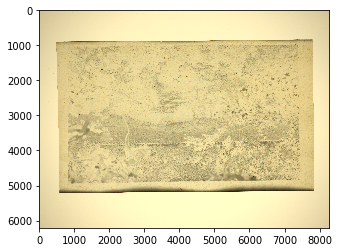

In [9]:
# load image with context manager that closes it afterwards, but it also means we can't re-process the negative data

# process first image with default settings with rawpy
with rawpy.imread(str(image_paths_list[0])) as raw_negative:
    print('loaded_image')
    rgb_negative = raw_negative.postprocess()
plt.imshow(rgb_negative)

In [10]:
# load image without closing so we can do multiple raw conversions in the cells below
raw_negative = rawpy.imread(str(image_paths_list[0]))

In [11]:
rawpy.flags

{'DNGLOSSYCODEC': True,
 'OPENMP': False,
 'LCMS': False,
 'REDCINECODEC': False,
 'RAWSPEED': False,
 'DEMOSAIC_PACK_GPL2': False,
 'DEMOSAIC_PACK_GPL3': False}

In [12]:
# time to get 8-bit linear, half_size, unprocessed image from RAW
time_8bit_halfsize = %timeit -o rgb_negative_linear = raw_negative.postprocess(half_size=True, output_color=rawpy.ColorSpace.raw, gamma=(1, 1), user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True)

440 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
dir(time_8bit_halfsize)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_precision',
 '_repr_pretty_',
 'all_runs',
 'average',
 'best',
 'compile_time',
 'loops',
 'repeat',
 'stdev',
 'timings',
 'worst']

In [14]:
round(time_8bit_halfsize.average, 2)

0.44

In [15]:
# get time to process 16-bit linear, half_size, unprocessed image from RAW
time_16bit_halfsize = %timeit -o rgb_negative_linear = raw_negative.postprocess(half_size=True, output_color=rawpy.ColorSpace.raw, gamma=(1, 1), user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, output_bps=16)

437 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# get times for 8-bit, full_size images
time_8_bit_fullsize = %timeit -o rgb_negative_linear = raw_negative.postprocess(half_size=False, output_color=rawpy.ColorSpace.raw, gamma=(1, 1), user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, output_bps=8)

6.19 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# get times for 16-bit, full_size images
time_16_bit_fullsize = %timeit -o rgb_negative_linear = raw_negative.postprocess(half_size=False, output_color=rawpy.ColorSpace.raw, gamma=(1, 1), user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, output_bps=16)

6.41 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# convert 16-bit to 8-bit values for displaying with matplotlib
rgb_negative_linear_8bit = (rgb_negative_linear/256).astype('uint8')

plt.imshow(rgb_negative_linear_8bit)

In [ ]:
# get flat-fielding frame with rawpy
image_path = Path('/Users/jeremy/Pictures/bennett_stitching_test/Capture/bennett_single-shot_003.RAF')
flatfield = rawpy.imread(str(image_path))
rgb_flatfield = flatfield.postprocess()

plt.imshow(rgb_flatfield)

In [ ]:
# get 16-bit, linear, unprocessed flat-fielding frame
rgb_flatfield_linear = flatfield.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), 
                                               user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, output_bps=16)

# convert 16-bit to 8-bit values for displaying with matplotlib
rgb_flatfield_linear_8bit = (rgb_flatfield_linear/256).astype('uint8')

plt.imshow(rgb_flatfield_linear_8bit)

In [ ]:
# 16-bit image is not on a 2**8 scale, but 2**16
2**16

In [ ]:
# get pixels with maximum value
np.where(rgb_flatfield_linear == 65535)

In [ ]:
# output is y, x, channel
rgb_flatfield_linear[6110, 4841, 1]

In [ ]:
250*256

In [ ]:
np.where(rgb_flatfield_linear > 64000)

In [ ]:
# how many pixels?
len(np.where(rgb_flatfield_linear >= 64000)[0])

In [ ]:
# if you want to write the images out to disk now
imageio.imwrite((data_directory_path.joinpath('negative_linear.tif')), rgb_negative_linear)
imageio.imwrite((data_directory_path.joinpath('flatfield_linear.tif')), rgb_flatfield_linear)
!open {str(data_directory_path)}

In [ ]:
# in photoshop i would 

In [ ]:
flatfielded = rgb_negative_linear / rgb_flatfield_linear

# convert 16-bit to 8-bit values for displaying with matplotlib
flatfielded_8bit = (flatfielded/256).astype('uint8')

plt.imshow(flatfielded_8bit)

Having issues because our flatfielding image has pixels with value 0

Divide by zero is bad!

In [ ]:
# get list of pixels where a value is 0
zero_list = np.where(rgb_flatfield_linear == 0)

# produces 3 arrays: y, x, channel
zero_list

In [ ]:
# loop through list of pixels with value zero and print out x, y, & color channel

print('x y color channel')
for index, y in enumerate(zero_list[0]):
    x = zero_list[1][index]
    channel = zero_list[2][index]
    if channel == 0:
        color = 'r'
    elif channel == 1:
        color = 'g'
    else:
        color = 'b'
    print(x, y, color)

In [ ]:
# need to blur LCC image before using as flatfield
# best practice might be to take the picture out of focus?
# take multiple pictures?

In [ ]:
# can only cv2.medianBlur 16-bit images with a kernel size of 5 or 8
rgb_flatfield_linear_blurred = cv2.medianBlur(rgb_flatfield_linear, 5)

# convert 16-bit to 8-bit values for displaying with matplotlib
rgb_flatfield_linear_blurred_8bit = (rgb_flatfield_linear_blurred/256).astype('uint8')

plt.imshow(rgb_flatfield_linear_blurred_8bit)

In [ ]:
# after blurring get list of pixels where a value is 0
zero_list = np.where(rgb_flatfield_linear_blurred == 0)

# produces 3 arrays: y, x, channel
zero_list

In [ ]:
# after blurring get list of pixels where a value is 65335
zero_list = np.where(rgb_flatfield_linear_blurred == 65335)

# produces 3 arrays: y, x, channel
zero_list

In [ ]:
rgb_flatfield_linear_blurred.max()

In [ ]:
63069//256

In [ ]:
# convert 16-bit to 8-bit values for higher medianBlur test
rgb_flatfield_linear_8bit = (rgb_flatfield_linear/256).astype('uint8')

# can only cv2.medianBlur 16-bit images with a kernel size of 5 or 8
rgb_flatfield_linear_blurred_8bit_test = cv2.medianBlur(rgb_flatfield_linear_8bit, 15)

plt.imshow(rgb_flatfield_linear_blurred_8bit_test)

In [ ]:
# get list of pixels where a value is 0
zero_list = np.where(rgb_flatfield_linear_blurred_8bit_test == 0)

# produces 3 arrays: y, x, channel
zero_list

In [ ]:
# get list of pixels where a value is 0
zero_list = np.where(rgb_flatfield_linear_blurred_8bit_test == 255)

# produces 3 arrays: y, x, channel
zero_list

In [ ]:
image_copy = rgb_flatfield_linear_blurred_8bit_test.copy()

black_pixels_mask = np.all(rgb_flatfield_linear_blurred_8bit_test == [0, 0, 0], axis=-1)

non_black_pixels_mask = np.any(rgb_flatfield_linear_blurred_8bit_test != [0, 0, 0], axis=-1)  
# or non_black_pixels_mask = ~black_pixels_mask

image_copy[black_pixels_mask] = [255, 255, 255]
image_copy[non_black_pixels_mask] = [0, 0, 0]

plt.imshow(image_copy)
plt.show()